<a href="https://colab.research.google.com/github/fabian-prog/LGMVIP-projects/blob/main/decisiontrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dirname=('/content/drive/MyDrive/Iris1.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Iris1.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [ ]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [ ]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [ ]:
df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [ ]:
df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


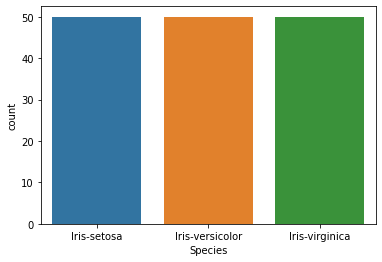

In [ ]:
sns.countplot(df['Species']);

In [ ]:
X=np.asarray(df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']])
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y=np.asarray(df[['Species']])
y[0:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state =0)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
y_train.shape

(112, 1)

In [ ]:
y_test.shape

(38, 1)

In [ ]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

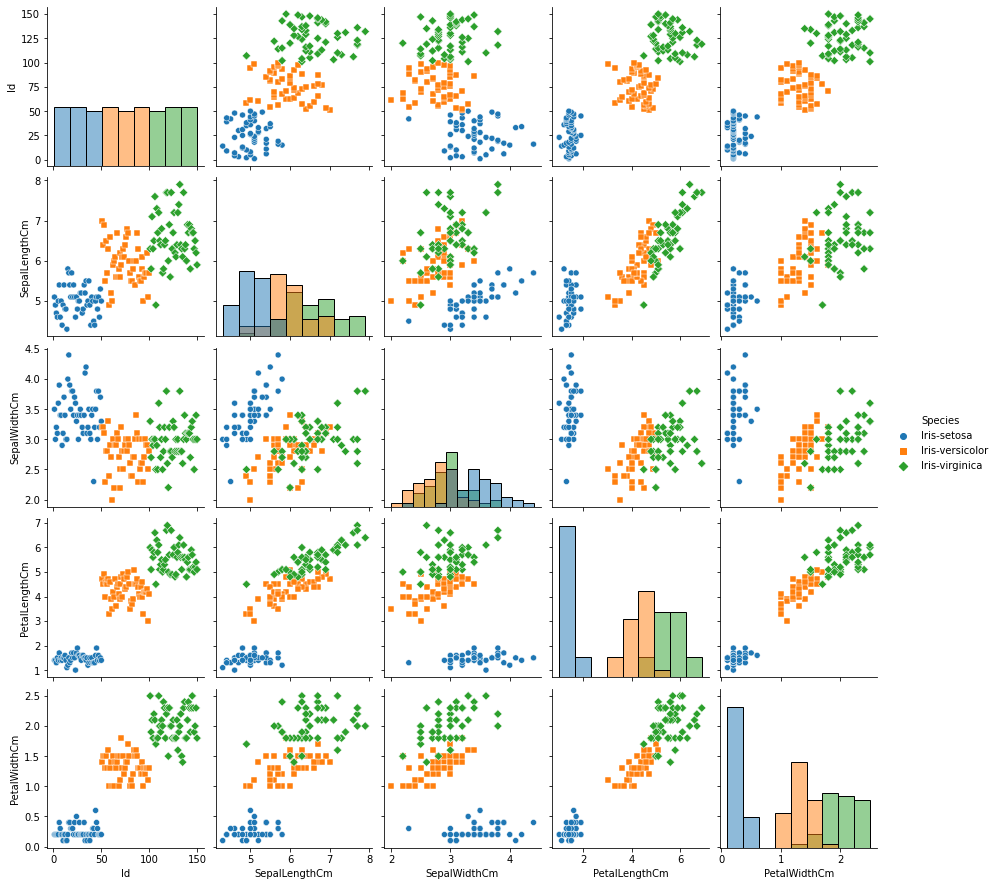

In [ ]:
sns.pairplot(df, hue="Species", diag_kind="hist",markers=['o','s','D'])

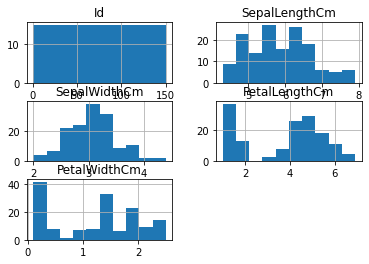

In [ ]:
df.hist()
plt.show()

In [ ]:
yhat=model.predict(X_test)

In [ ]:
yhat

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [ ]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa
5,6,5.40,3.90,1.70,0.40,Iris-setosa
6,7,4.60,3.40,1.40,0.30,Iris-setosa
7,8,5.00,3.40,1.50,0.20,Iris-setosa
8,9,4.40,2.90,1.40,0.20,Iris-setosa
9,10,4.90,3.10,1.50,0.10,Iris-setosa


In [ ]:
df.head(110)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa
...,...,...,...,...,...,...
105,106,7.60,3.00,6.60,2.10,Iris-virginica
106,107,4.90,2.50,4.50,1.70,Iris-virginica
107,108,7.30,2.90,6.30,1.80,Iris-virginica
108,109,6.70,2.50,5.80,1.80,Iris-virginica


In [ ]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
57,58,4.90,2.40,3.30,1.00,Iris-versicolor
102,103,7.10,3.00,5.90,2.10,Iris-virginica
35,36,5.00,3.20,1.20,0.20,Iris-setosa
55,56,5.70,2.80,4.50,1.30,Iris-versicolor
104,105,6.50,3.00,5.80,2.20,Iris-virginica
25,26,5.00,3.00,1.60,0.20,Iris-setosa
67,68,5.80,2.70,4.10,1.00,Iris-versicolor
43,44,5.00,3.50,1.60,0.60,Iris-setosa
37,38,4.90,3.10,1.50,0.10,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

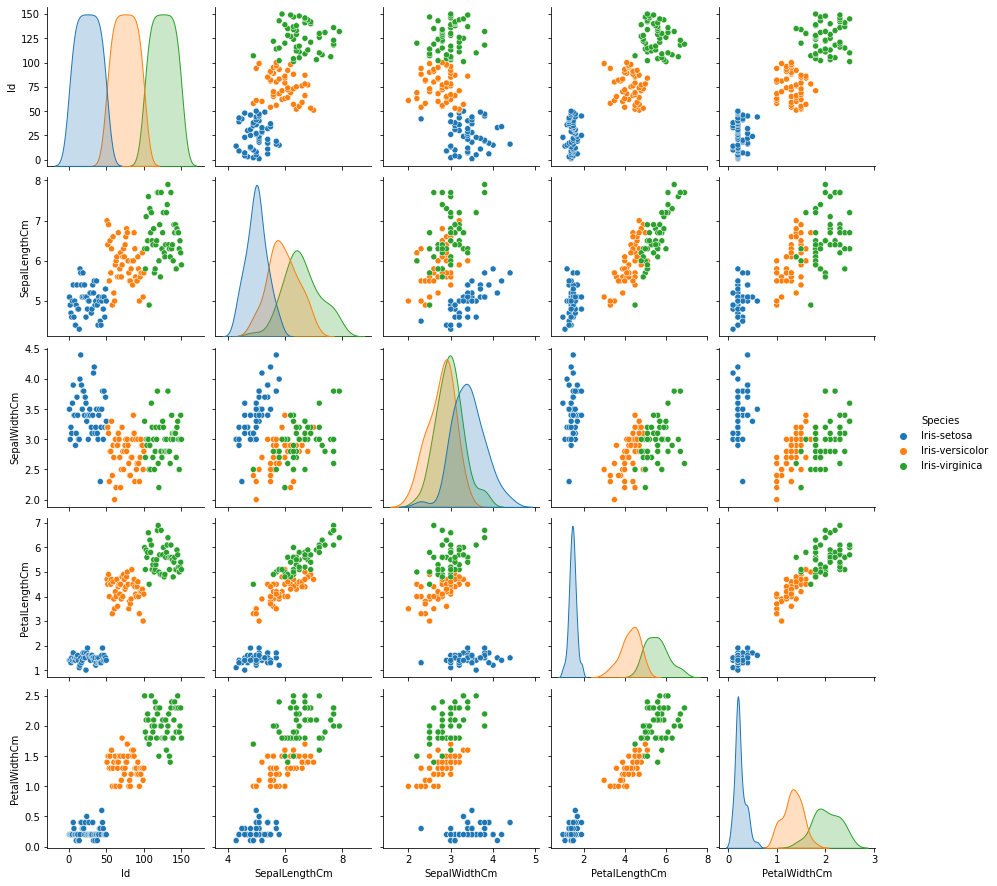

In [ ]:
sns.pairplot(df,hue='Species')

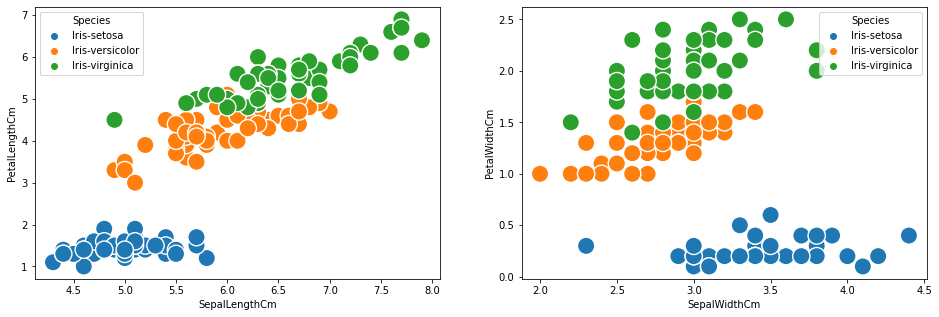

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species',ax=ax2,s=300,marker='o')

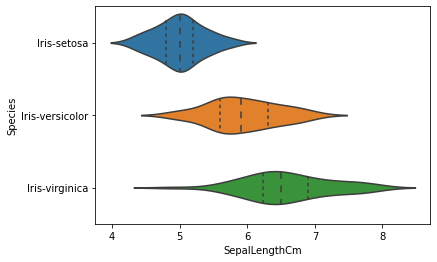

In [ ]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()

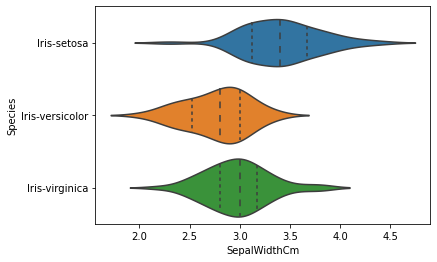

In [ ]:
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()

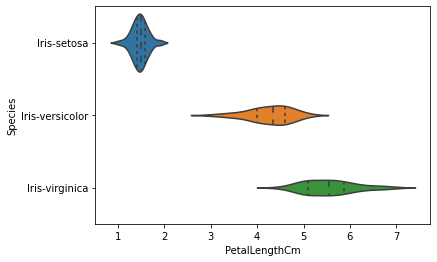

In [ ]:
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()

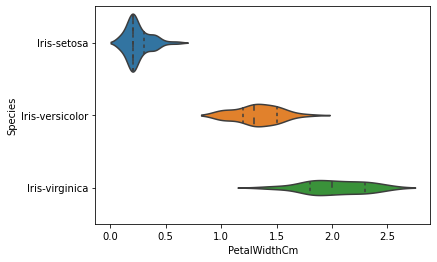

In [ ]:
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

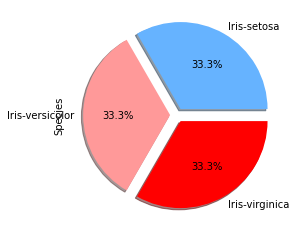

In [ ]:
#Pie plot to show the overall types of Iris classifications
colors = ['#66b3ff','#ff9999','red']
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

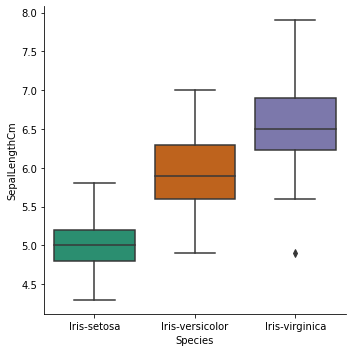

In [ ]:
sns.catplot(x='Species',y='SepalLengthCm',data=df,kind='box',palette='Dark2')

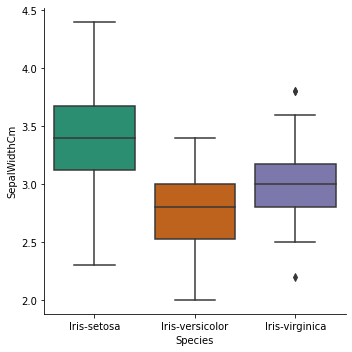

In [ ]:
sns.catplot(x='Species',y='SepalWidthCm',data=df,kind='box',palette='Dark2')

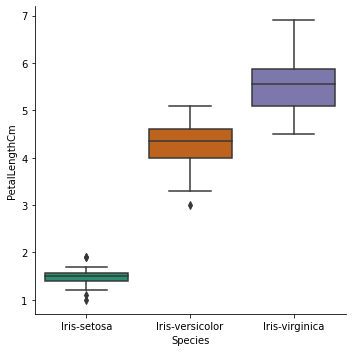

In [ ]:
sns.catplot(x='Species',y='PetalLengthCm',data=df,kind='box',palette='Dark2')

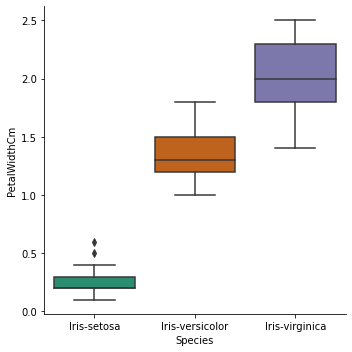

In [ ]:
sns.catplot(x='Species',y='PetalWidthCm',data=df,kind='box',palette='Dark2')

In [ ]:
pd.get_dummies(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.10,3.50,1.40,0.20,1,0,0
1,2,4.90,3.00,1.40,0.20,1,0,0
2,3,4.70,3.20,1.30,0.20,1,0,0
3,4,4.60,3.10,1.50,0.20,1,0,0
4,5,5.00,3.60,1.40,0.20,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.70,3.00,5.20,2.30,0,0,1
146,147,6.30,2.50,5.00,1.90,0,0,1
147,148,6.50,3.00,5.20,2.00,0,0,1
148,149,6.20,3.40,5.40,2.30,0,0,1


In [ ]:
pd.get_dummies(df.drop('Species',axis=1),drop_first=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.10,3.50,1.40,0.20
1,2,4.90,3.00,1.40,0.20
2,3,4.70,3.20,1.30,0.20
3,4,4.60,3.10,1.50,0.20
4,5,5.00,3.60,1.40,0.20
...,...,...,...,...,...
145,146,6.70,3.00,5.20,2.30
146,147,6.30,2.50,5.00,1.90
147,148,6.50,3.00,5.20,2.00
148,149,6.20,3.40,5.40,2.30


In [ ]:
pd.get_dummies(df.drop('Species',axis=1),drop_first=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.10,3.50,1.40,0.20
1,2,4.90,3.00,1.40,0.20
2,3,4.70,3.20,1.30,0.20
3,4,4.60,3.10,1.50,0.20
4,5,5.00,3.60,1.40,0.20
...,...,...,...,...,...
145,146,6.70,3.00,5.20,2.30
146,147,6.30,2.50,5.00,1.90
147,148,6.50,3.00,5.20,2.00
148,149,6.20,3.40,5.40,2.30


In [ ]:
#TRAIN AND TEST SPLIT
X = pd.get_dummies(df.drop('Species',axis=1),drop_first=True)
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

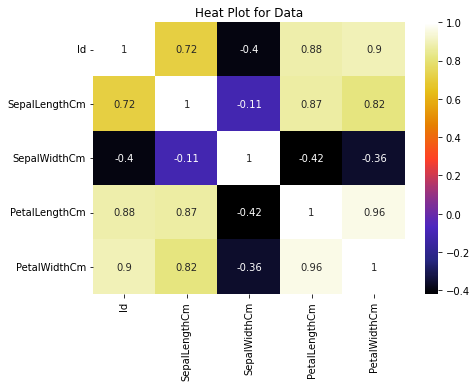

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()


In [ ]:
#Defining independent and dependent variables
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values   #defining the feature matrix
y = df.Species

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4444444444444444, 0.9166666666666666, 'petal width(cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5555555555555556, 0.75, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(0.3333333333333333, 0.5833333333333334, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(0.2222222222222222, 0.4166666666666667, 'petal width(cm) <= 1.65\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Iris-versicolor'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.25, 'sepal width(cm) <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0

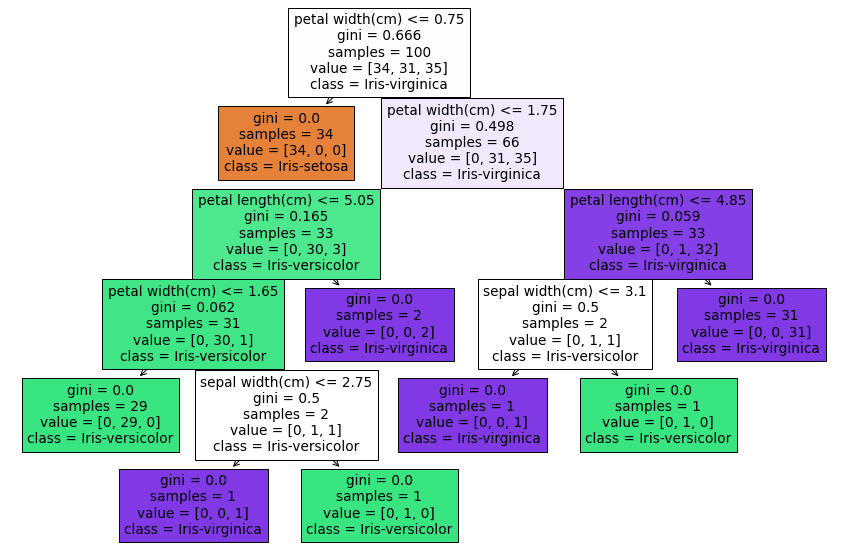

In [ ]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

In [ ]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [ ]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


In [ ]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

Accuracy: 192%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


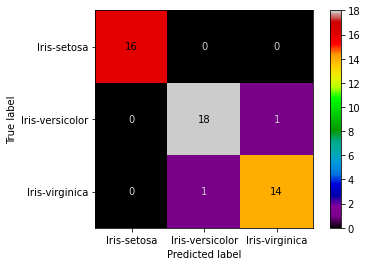

In [ ]:
print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy: {round(score*200)}%')

In [ ]:
dtree.predict([[5, 3.6, 1.4 , 0.2]])
dtree.predict([[9, 3.1, 5, 1.5]])
dtree.predict([[4.1, 3.0, 5.1, 1.8]])

array(['Iris-virginica'], dtype=object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:

base_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,base_pred)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


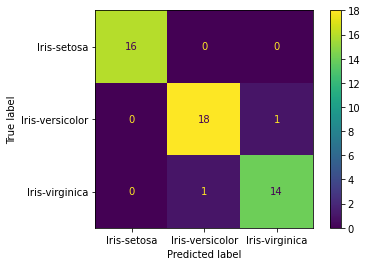

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
print(classification_report(y_test,base_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
model.feature_importances_

array([0.        , 0.02252929, 0.90897257, 0.06849814])